In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

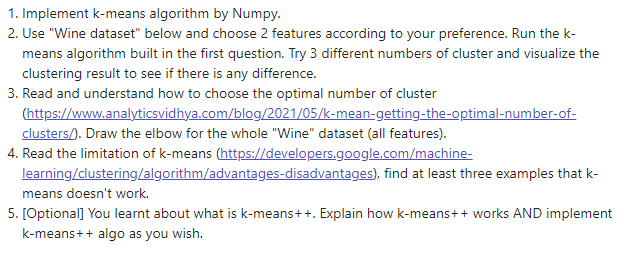

# Ex1

In [2]:
def kmeans(X, k, max_iters=300):
    """K-means clustering algorithm."""

    n_samples = X.shape[0]

    # Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    # Iterations
    for _ in range(max_iters):
        # Assign samples to closest centroids
        assignments = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)

        # Update centroids
        old_centroids = centroids
        for i in range(k):
            centroids[i] = np.mean(X[assignments == i], axis=0)

        # Check for convergence
        if np.all(old_centroids == centroids):
            break

    return centroids, assignments


# Ex2

In [3]:
data = pd.read_csv("wine-clustering.csv")

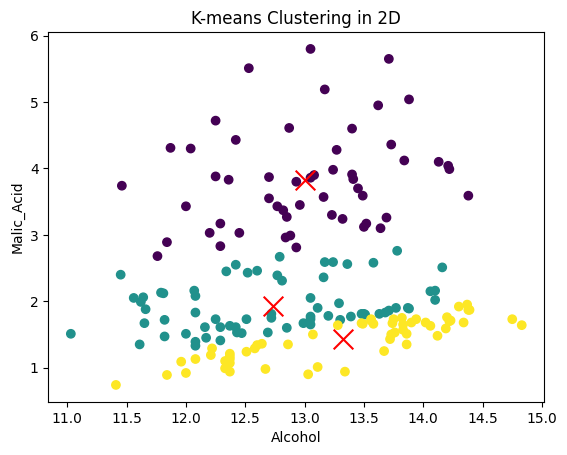

In [4]:
# Preparing input 
X = data.iloc[:, :2]  # Assuming features are in the first columns
k = 3  # Number of clusters
centroids, assignments = kmeans(X.values, k)

# Plotting clusters (for 2D data)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=assignments)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-means Clustering in 2D')
plt.show()

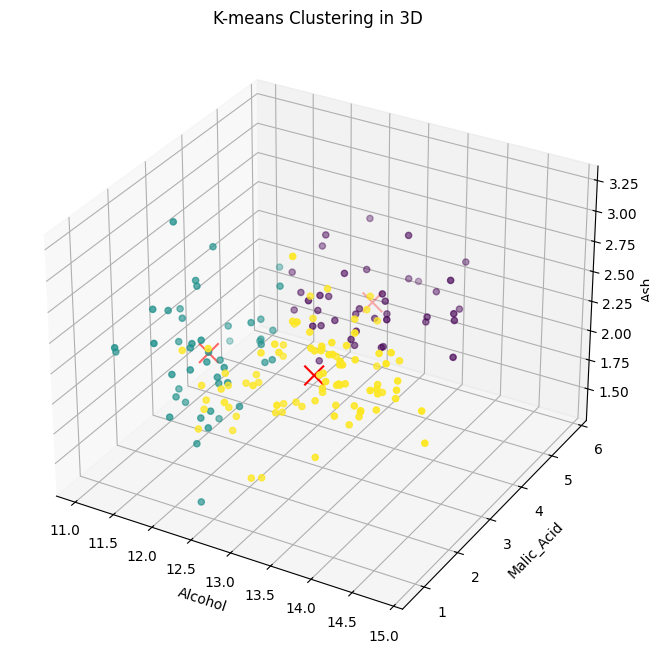

In [12]:
# Preparing input
X = data.iloc[:, :3] 
k = 3  # Number of clusters
centroids, assignments = kmeans(X.values, k)


# Plotting clusters (for 3D data)
fig = plt.figure(figsize=(8, 8,))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=assignments, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200)
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2],rotation = 90)
ax.set_title('K-means Clustering in 3D')
plt.show()


# Ex3

In [13]:
from sklearn.cluster import KMeans